In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#loading the datasets
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
#preprocessing the data by selecting only the digits '0' and '1'
mask = mnist.target.astype(int) <= 1
#here x is a independent variable and y is a dependent variable
X, y = mnist.data[mask], mnist.target[mask].astype(int)

In [4]:
#Data normalization - any image that should cross 255 pixel 
X = X/255.0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#or 
#X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


In [6]:
#Training the logistic regression model for 1000 times
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
#Making the predictions and storing in y(dependent variable)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [8]:
#printing the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accracy: ", train_accuracy*100)
print("Testing accuracy: ", test_accuracy*100)

Training accracy:  99.99154262516915
Testing accuracy:  99.96617050067658


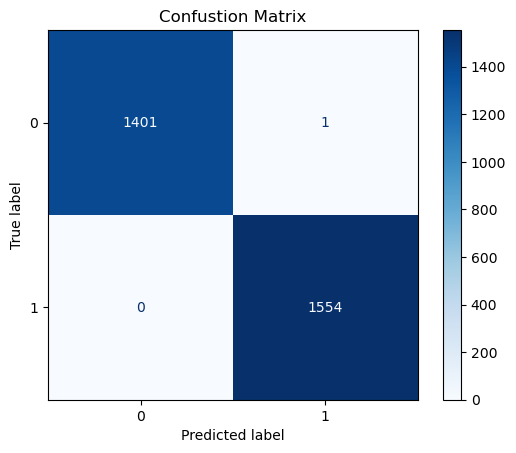

In [9]:
#confustion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("Confustion Matrix")
plt.show()

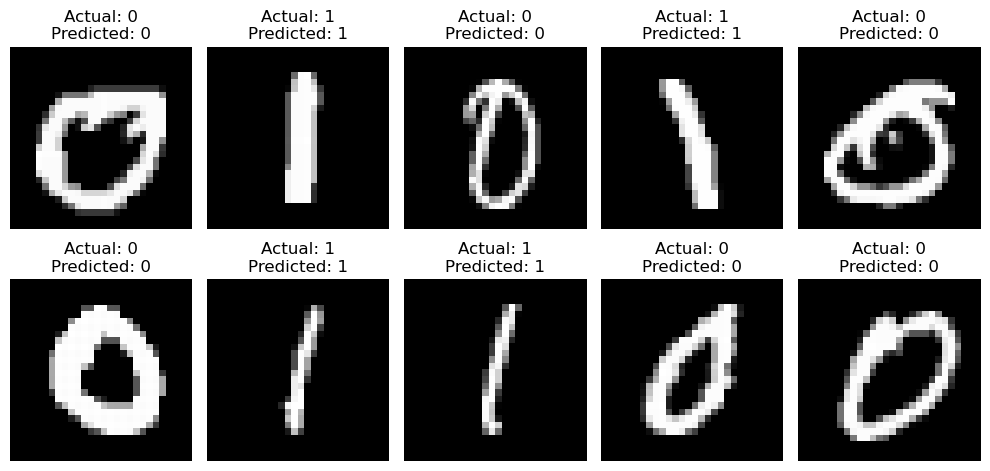

In [11]:
fig, axes = plt.subplots(2, 5, figsize = (10,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.iloc[i].values.reshape(28,28), cmap='gray')
    ax.set_title(f"Actual: {y_test.iloc[i]}\nPredicted: {y_test_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()